# Detecção de Fraudes: Comparando Modelos de Aprendizado de Máquina para o Reconhecimento de Transações Potencialmente Fraudulentas



## Importanto Bibliotecas e Dataset

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pymc as pm
import arviz as az
import numpy as np
import pytensor.tensor as tt
import pandas as pd
from google.colab import drive, files
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from scipy.stats import mode
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [2]:
drive.mount('/content/drive')
!dir '/content/drive/MyDrive/IC/'

Mounted at /content/drive
New\ dataset  Old


In [3]:
creditcard_df = pd.read_csv('/content/drive/MyDrive/IC/New dataset/creditcard_csv.csv')
creditcard_df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,'0'
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,'0'
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,'0'
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,'0'
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,'0'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,'0'
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,'0'
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,'0'
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,'0'


## Consistência dos Dados

In [4]:
print('quantidade de linhas e colunas:', creditcard_df.shape)
print('=' * 40)
print('\n quantidade de NAs:\n', creditcard_df.isnull().sum())
print('=' * 40)
print('\n colunas da base:\n', creditcard_df.columns)
print('=' * 40)
print('\n quantidade de duplicatas:', creditcard_df.duplicated().sum())
print('=' * 40)
print('\n tipos das colunas:', creditcard_df.dtypes)
print('=' * 40)
print('\nQuantidade de classes únicas (variável resposta):', creditcard_df['Class'].nunique())

quantidade de linhas e colunas: (284807, 31)

 quantidade de NAs:
 Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

 colunas da base:
 Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

 quantidade de duplicatas: 1081

 tipos das colunas: Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       f

In [5]:
creditcard_df[['Time','Amount']].describe()

,Time,Amount
count,284807.000000,284807.000000
mean,94813.859575,88.349619
std,47488.145955,250.120109
min,0.000000,0.000000
25%,54201.500000,5.600000
50%,84692.000000,22.000000
75%,139320.500000,77.165000
max,172792.000000,25691.160000


In [6]:
creditcard_df["Class"] = creditcard_df["Class"].str.replace("'", "", regex=False).astype(int)
creditcard_df.drop_duplicates(inplace=True)

In [7]:
creditcard_df["Class"].value_counts()

,count
Class,
0,283253
1,473


In [8]:
#Proporção de fraudes na base - (0,017%)
creditcard_df["Class"].value_counts()/len(creditcard_df)

,count
Class,
0,0.998333
1,0.001667


## Medindo correlações

###Pearson

In [9]:
scaler = MinMaxScaler()
df_normalizado = pd.DataFrame(scaler.fit_transform(creditcard_df), columns=creditcard_df.columns)

print(df_normalizado.describe())

                Time             V1             V2             V3  \
count  283726.000000  283726.000000  283726.000000  283726.000000   
mean        0.548701       0.958394       0.767215       0.837442   
std         0.274787       0.033095       0.017375       0.026143   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.313699       0.942733       0.760924       0.821997   
50%         0.490141       0.958640       0.767933       0.840532   
75%         0.806160       0.980652       0.775703       0.855209   
max         1.000000       1.000000       1.000000       1.000000   

                  V4             V5             V6             V7  \
count  283726.000000  283726.000000  283726.000000  283726.000000   
mean        0.251799       0.765729       0.263008       0.265366   
std         0.062690       0.009270       0.013391       0.007479   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.214244       0.7610

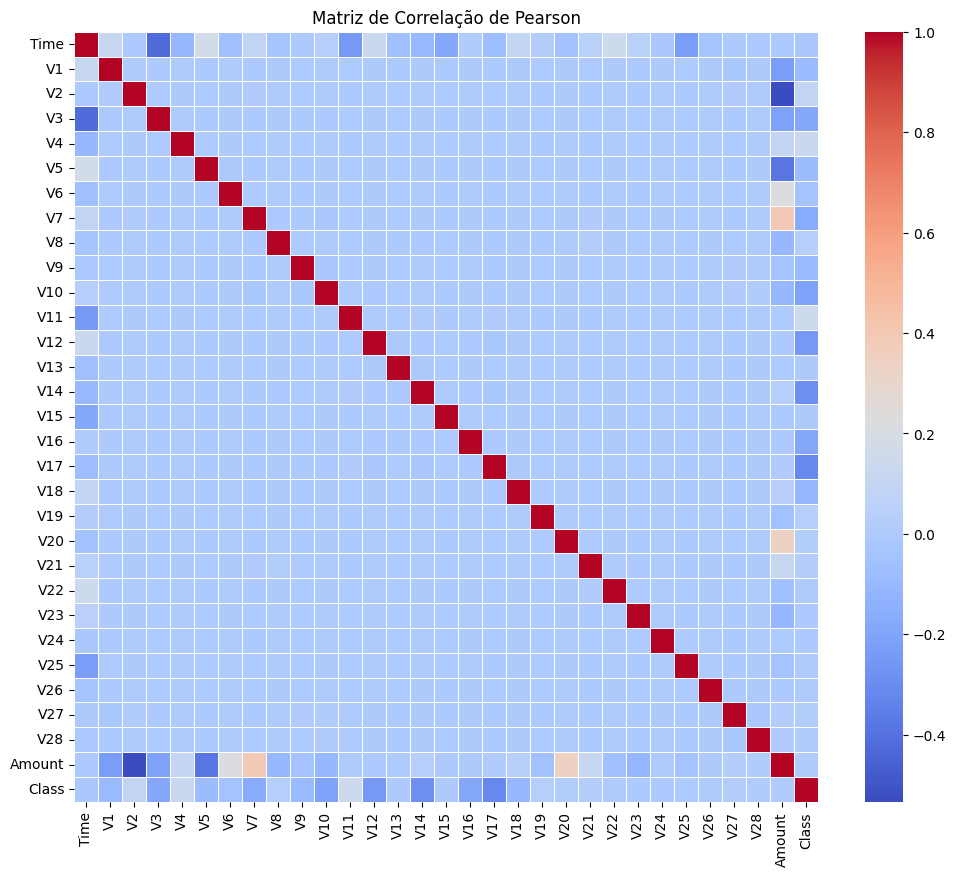

In [10]:
correlation_matrix = df_normalizado.corr(method='pearson')
plt.figure(figsize=(12, 10))

sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt='.2f', linewidths=0.5)

plt.title('Matriz de Correlação de Pearson')

plt.show()

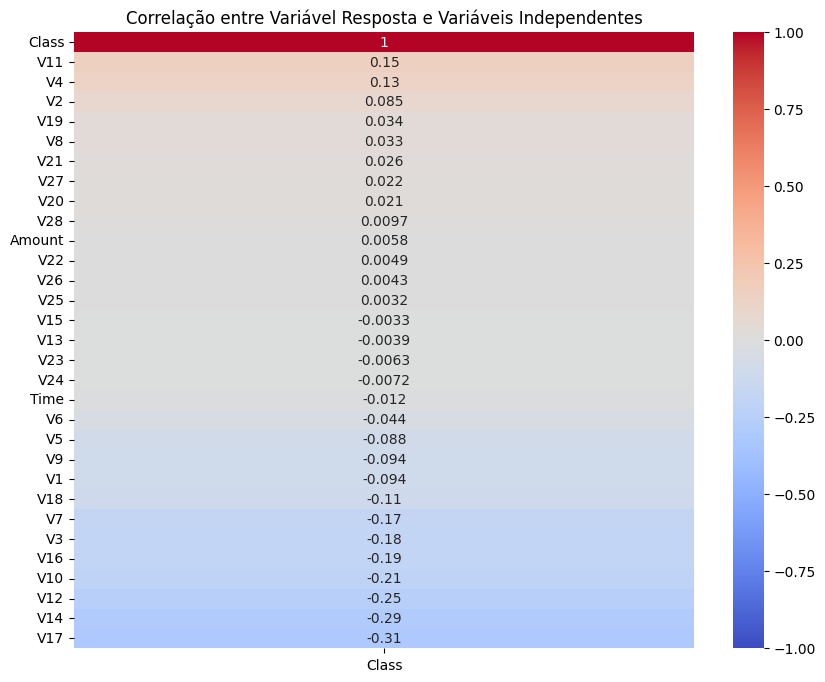

In [11]:
correlacao = df_normalizado.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlacao[['Class']].sort_values(by='Class', ascending=False), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlação entre Variável Resposta e Variáveis Independentes')
plt.show()

In [12]:
#Escolhi, a principio as variaceis v17, v14 e 12, pois, apesarem se ter alta correlação com a variavel resposta, não possuem alta correlação entre si mesmas

## Plotando Variáveis

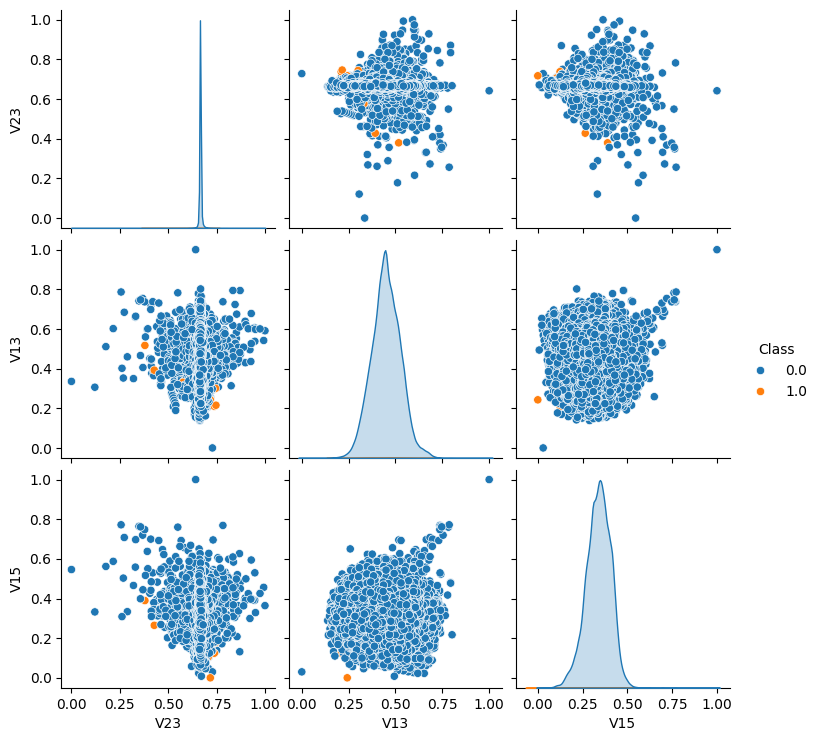

In [13]:
sns.pairplot(df_normalizado[['V23', 'V13', 'V15', 'Class']], hue='Class')
plt.show()
#variaveis com baixa correlação

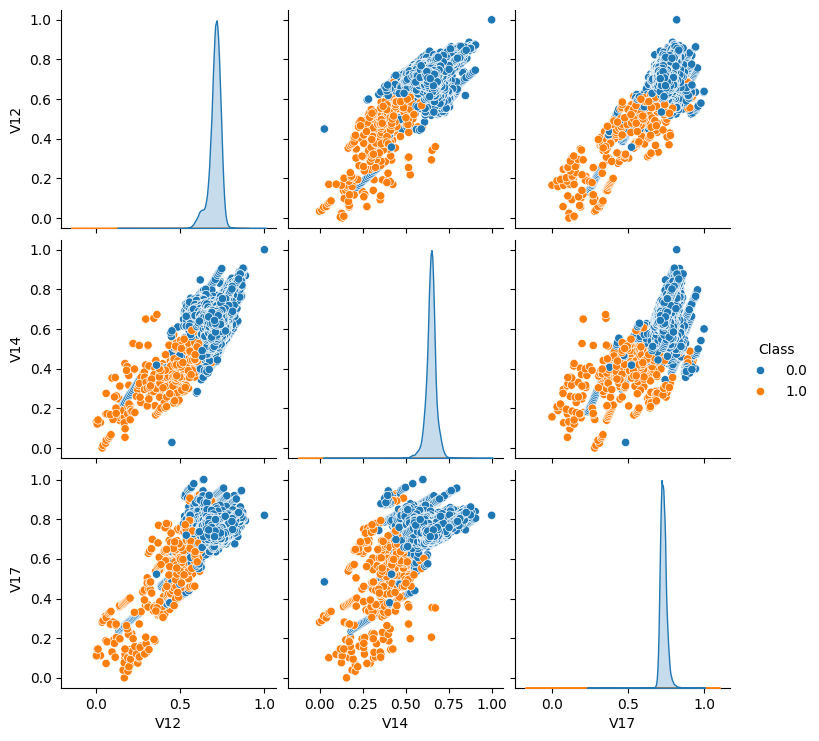

In [14]:
sns.pairplot(df_normalizado[['V12', 'V14', 'V17', 'Class']], hue='Class')
plt.show()
#variaveis com alta correlação

## Checando Escala das Variáveis

In [ ]:
creditcard_df.iloc[:, 1:29].describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
count,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,...,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000
mean,0.005917,-0.004135,0.001613,-0.002966,0.001828,-0.001139,0.001801,-0.000854,-0.001596,-0.001441,...,-0.000264,0.000187,-0.000371,-0.000015,0.000198,0.000214,-0.000232,0.000149,0.001763,0.000547
std,1.948026,1.646703,1.508682,1.414184,1.377008,1.331931,1.227664,1.179054,1.095492,1.076407,...,0.813379,0.769984,0.723909,0.724550,0.623702,0.605627,0.521220,0.482053,0.395744,0.328027
min,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,-24.588262,...,-7.213527,-54.497720,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084
25%,-0.915951,-0.600321,-0.889682,-0.850134,-0.689830,-0.769031,-0.552509,-0.208828,-0.644221,-0.535578,...,-0.456289,-0.211469,-0.228305,-0.542700,-0.161703,-0.354453,-0.317485,-0.326763,-0.070641,-0.052818
50%,0.020384,0.063949,0.179963,-0.022248,-0.053468,-0.275168,0.040859,0.021898,-0.052596,-0.093237,...,0.003367,-0.062353,-0.029441,0.006675,-0.011159,0.041016,0.016278,-0.052172,0.001479,0.011288
75%,1.316068,0.800283,1.026960,0.739647,0.612218,0.396792,0.570474,0.325704,0.595977,0.453619,...,0.458508,0.133207,0.186194,0.528245,0.147748,0.439738,0.350667,0.240261,0.091208,0.078276
max,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,23.745136,...,5.591971,39.420904,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808


## Pré-processamento

In [ ]:
x = df_normalizado[['V14', 'V17', 'V12']]
y = df_normalizado[['Class']]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [ ]:
coords_corr = {
    'features': ['V14',
                 'V17',
                 'V12']
}

## Modelo 1 - Regressão Logística

In [ ]:
with pm.Model(coords=coords_corr) as model_1:
  betas = pm.Normal("beta",0,1,dims="features")
  alpha = pm.Normal("alpha",0,1)

  X = [
    pm.MutableData("X_"+column,X_train[column].values.ravel())
    for column in X_train.columns ]
  y = pm.MutableData("y",y_train.values.ravel())

  mu = alpha + tt.dot(betas,X)
  likelihood = pm.Bernoulli("likelihood",pm.math.invlogit(mu),observed=y)

/usr/local/lib/python3.10/dist-packages/pymc/data.py:321: FutureWarning: MutableData is deprecated. All Data variables are now mutable. Use Data instead.
  warnings.warn(


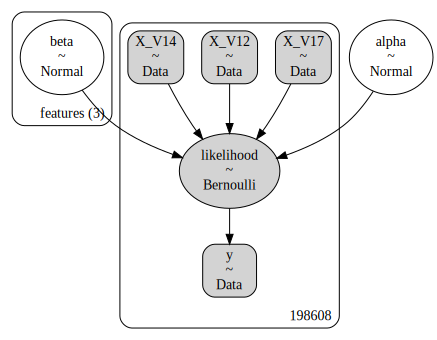

In [ ]:
pm.model_to_graphviz(model_1)

In [ ]:
with model_1:
  approx_1 = pm.fit(20000)

Output()

In [ ]:
# plt.plot(approx_2.hist)
# plt.title('ELBO Progress')
# plt.xlabel('Iterations')
# plt.ylabel('ELBO value')
# plt.show()

#Sabemos que convergiou pq os picos não continuaram na plotagem, caso os picos permaneçam no gráfico, não existe convergencia
# Parar de variar indica convergencia
# Aproximação da posteriori

In [ ]:
with model_1:
  trace_1 = approx_1.sample()

In [ ]:
pm.summary(trace_1)

Shape validation failed: input_shape: (1, 500), minimum_shape: (chains=2, draws=4)


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
alpha,-0.158,0.126,-0.391,0.084,0.005,0.004,531.0,424.0,NaN
beta[V14],-3.600,0.180,-3.915,-3.255,0.009,0.006,442.0,463.0,NaN
beta[V17],-2.582,0.152,-2.875,-2.309,0.008,0.005,394.0,497.0,NaN
beta[V12],-3.278,0.151,-3.543,-3.008,0.007,0.005,514.0,400.0,NaN


array([[<Axes: title={'center': 'alpha'}>,
        <Axes: title={'center': 'alpha'}>],
       [<Axes: title={'center': 'beta'}>,
        <Axes: title={'center': 'beta'}>]], dtype=object)

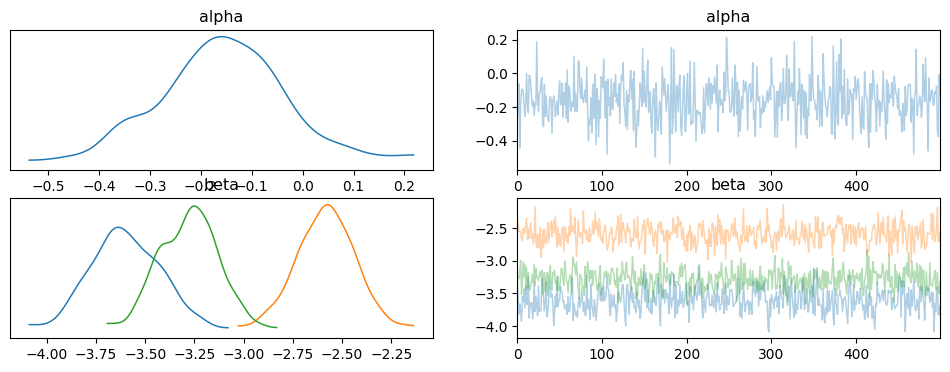

In [ ]:
az.plot_trace(trace_1)

In [ ]:
vars_1 = {"X_"+column : X_test[column].values
    for column in X_test.columns}
vars_1["y"] = y_test.values.ravel()

In [ ]:
with model_1:
  pm.set_data(vars_1)
  trace_post_1 = pm.sample_posterior_predictive(trace_1)

Output()

In [ ]:
mean_likelihood_1 = trace_post_1.posterior_predictive['likelihood'].mean(dim=['chain', 'draw'])
binary_predictions_1 = (mean_likelihood_1 > 0.2).astype(int)

In [ ]:
y_test_m1 = y_test.squeeze()  # Certifique-se de que é uma Série
binary_predictions_1 = binary_predictions_1.squeeze()  # O mesmo para as previsões

In [ ]:
y_test = y_test_m1.squeeze()
binary_predictions_1 = binary_predictions_1.squeeze()
abs_diff_1 = np.abs(y_test_m1 - binary_predictions_1)

In [ ]:
abs_diff_1 = np.abs(y_test_m1 - binary_predictions_1)

df_1 = pd.DataFrame({
    'V14': X_test['V14'],
    'V17': X_test['V17'],
    'V12': X_test['V12'],
    'y_test': y_test,
    'binary_predictions': binary_predictions_1,
    'abs_diff': abs_diff_1
})

In [ ]:
errors_1 = df_1["abs_diff"].sum()
acc_1 = (len(df_1)-errors_1)/len(df_1)
print(f"Acuracia: {acc_1:.4f}")
print(f"Erros: {errors_1}")

Acuracia: 0.9985
Erros: 131.0


In [ ]:
precision_1 = precision_score(y_test, binary_predictions_1)

recall_1 = recall_score(y_test, binary_predictions_1) #mostrar matriz de confusão

f1_1 = f1_score(y_test, binary_predictions_1)

print(f"Precision: {precision_1:.4f}")
print(f"Recall: {recall_1:.4f}")
print(f"F1 Score: {f1_1:.4f}")

Precision: 1.0000
Recall: 0.0296
F1 Score: 0.0576


## Modelo 2 - Regressão Logistica com LASSO

In [ ]:
with pm.Model(coords=coords_corr) as model_2:
    betas = pm.Laplace('beta', mu=0, b=1,dims="features")
    alpha = pm.Normal('alpha', mu=0, sigma=10)

    X = [
    pm.MutableData("X_"+column,X_train[column].values)
    for column in X_train.columns ]
    y = pm.MutableData("y",y_train.values.ravel())


    mu = alpha + tt.dot(betas,X)

    y_obs = pm.Bernoulli('y_obs', pm.math.invlogit(mu), observed=y)

/usr/local/lib/python3.10/dist-packages/pymc/data.py:321: FutureWarning: MutableData is deprecated. All Data variables are now mutable. Use Data instead.
  warnings.warn(


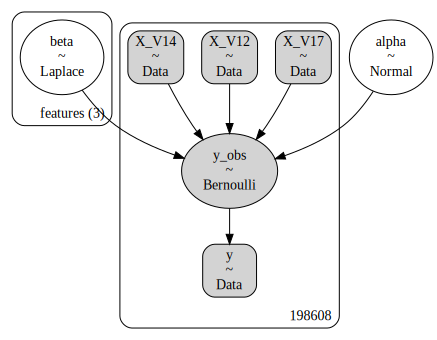

In [ ]:
pm.model_to_graphviz(model_2)

In [ ]:
with model_2:
  approx_2= pm.fit(20000)

Output()

In [ ]:
with model_2:
  trace_2 = approx_2.sample()

In [ ]:
pm.summary(trace_2)

Shape validation failed: input_shape: (1, 500), minimum_shape: (chains=2, draws=4)


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
alpha,-0.080,0.128,-0.330,0.138,0.005,0.004,558.0,471.0,NaN
beta[V14],-3.660,0.170,-3.999,-3.351,0.008,0.006,450.0,473.0,NaN
beta[V17],-2.574,0.146,-2.819,-2.255,0.007,0.005,495.0,474.0,NaN
beta[V12],-3.316,0.154,-3.609,-3.057,0.007,0.005,475.0,454.0,NaN


array([[<Axes: title={'center': 'alpha'}>,
        <Axes: title={'center': 'alpha'}>],
       [<Axes: title={'center': 'beta'}>,
        <Axes: title={'center': 'beta'}>]], dtype=object)

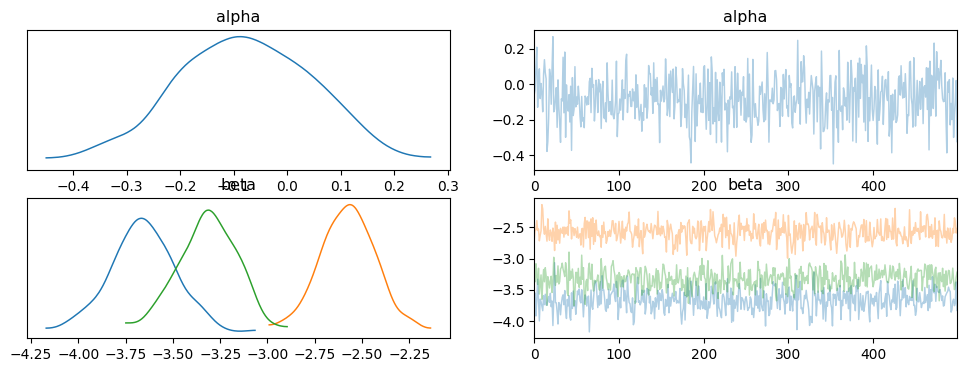

In [ ]:
az.plot_trace(trace_2)

In [ ]:
vars_2 = {"X_"+column : X_test[column].values
    for column in X_test.columns}
vars_2["y"] = y_test

In [ ]:
with model_2:
  pm.set_data(vars_2)
  trace_post_2 = pm.sample_posterior_predictive(trace_2)

Output()

In [ ]:
mean_likelihood_2 = trace_post_2.posterior_predictive['y_obs'].mean(dim=['chain', 'draw'])
binary_predictions_2 = (mean_likelihood_2 > 0.2).astype(int)

In [ ]:
abs_diff_2 = np.abs(y_test - binary_predictions_2)

df_2 = pd.DataFrame({
    'V14': X_test['V14'],
    'V17': X_test['V17'],
    'V12': X_test['V12'],
    'y_test': y_test,
    'binary_predictions': binary_predictions_2,
    'abs_diff': abs_diff_2
})

In [ ]:
errors_2 = df_2["abs_diff"].sum()
acc_2 = (len(df_2)-errors_2)/len(df_2)
print(f"Acuracia: {acc_2:.4f}")
print(f"Erros: {errors_2}")

Acuracia: 0.9985
Erros: 130.0


In [ ]:
precision_2 = precision_score(y_test, binary_predictions_2)

recall_2 = recall_score(y_test, binary_predictions_2) #mostrar matriz de confusão

f1_2 = f1_score(y_test, binary_predictions_2)

print(f"Precision: {precision_2:.4f}")
print(f"Recall: {recall_2:.4f}")
print(f"F1 Score: {f1_2:.4f}")

Precision: 1.0000
Recall: 0.0370
F1 Score: 0.0714


## Modelo 3 - Oversampling + Regressão Logística com LASSO

In [ ]:
y = df_normalizado["Class"]

smote = SMOTE(random_state=42)

X_resampled, y_resampled = smote.fit_resample(x, y)

print(f"Tamanho original (classe 0, classe 1): {y.value_counts()}")
print(f"Tamanho após oversampling (classe 0, classe 1): {y_resampled.value_counts()}")

Tamanho original (classe 0, classe 1): Class
0.0    283253
1.0       473
Name: count, dtype: int64
Tamanho após oversampling (classe 0, classe 1): Class
0.0    283253
1.0    283253
Name: count, dtype: int64


In [ ]:
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_resampled, y_resampled, test_size=0.3)

In [ ]:
with pm.Model(coords=coords_corr) as model_3:
    betas = pm.Laplace('beta', mu=0, b=1,dims="features")
    alpha = pm.Normal('alpha', mu=0, sigma=10)

    X = [
    pm.MutableData("X_"+column,X_train_r[column].values)
    for column in X_train_r.columns ]
    y = pm.MutableData("y",y_train_r)


    mu = alpha + tt.dot(betas,X)


    y_obs = pm.Bernoulli('y_obs', pm.math.invlogit(mu), observed=y)

/usr/local/lib/python3.10/dist-packages/pymc/data.py:321: FutureWarning: MutableData is deprecated. All Data variables are now mutable. Use Data instead.
  warnings.warn(


In [ ]:
with model_3:
  approx_3= pm.fit(20000)

Output()

In [ ]:
with model_3:
  trace_3 = approx_3.sample()

In [ ]:
vars_3 = {"X_"+column : X_test_r[column].values
    for column in X_test_r.columns}
vars_3["y"] = y_test_r

In [ ]:
with model_3:
  pm.set_data(vars_3)
  trace_post_3 = pm.sample_posterior_predictive(trace_3)

Output()

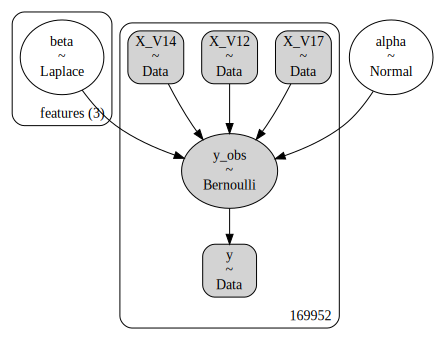

In [ ]:
pm.model_to_graphviz(model_3)

In [ ]:
mean_likelihood_3 = trace_post_3.posterior_predictive['y_obs'].mean(dim=['chain', 'draw'])
binary_predictions_3 = (mean_likelihood_3 > 0.5).astype(int)

In [ ]:
abs_diff_3 = np.abs(y_test_r - binary_predictions_3)

df_3 = pd.DataFrame({
    'V14': X_test_r['V14'],
    'V17': X_test_r['V17'],
    'V12': X_test_r['V12'],
    'y_test': y_test_r,
    'binary_predictions': binary_predictions_3,
    'abs_diff': abs_diff_3
})

In [ ]:
errors_3 = df_3["abs_diff"].sum()
acc_3 = (len(df_3)-errors_3)/len(df_3)
print(f"Acuracia: {acc_3:.4f}")
print(f"Erros: {errors_3}")

Acuracia: 0.8736
Erros: 21476.0


## Modelo 4 - Processo Gaussiano Classificador (GPC)

In [ ]:
amostra_proporcao = 0.005

df_amostra, _ = train_test_split(
    df_normalizado,
    test_size=1 - amostra_proporcao,  # Porcentagem de dados na amostra
    stratify=df_normalizado['Class'],
    random_state=42
)

print('Proporção de classes base amostrada:\n', df_amostra['Class'].value_counts(normalize=True))
print('Proporção de classes base original:\n', df_normalizado['Class'].value_counts(normalize=True))

Proporção de classes base amostrada:
 Class
0.0    0.99859
1.0    0.00141
Name: proportion, dtype: float64
Proporção de classes base original:
 Class
0.0    0.998333
1.0    0.001667
Name: proportion, dtype: float64


In [ ]:
x_amostra = df_amostra[['V14', 'V17', 'V12']]
y_amostra = df_amostra[['Class']].values.ravel()

X_train_amostra, X_test_amostra, y_train_amostra, y_test_amostra = train_test_split(x_amostra, y_amostra, test_size=0.3)

In [ ]:
with pm.Model() as model_4:
    l = pm.HalfNormal("l0", 1)
    cov = pm.gp.cov.Matern32(3, ls=l)
    gp = pm.gp.Latent(cov_func=cov)

    s = pm.HalfNormal("s0", sigma=1, shape=3)

    l1 = pm.HalfNormal("l1", 1)
    cov1 = pm.gp.cov.Matern32(3, ls=l1)
    gp1 = pm.gp.Latent(cov_func=cov1)

    f = gp.prior("f", X=X_train_amostra.values)
    g = gp1.prior("g", X=X_train_amostra.values)

    fs = pm.math.stack([f, g], axis=1)
    j = pm.Deterministic("j", fs)
    p = pm.Deterministic("p", pm.math.softmax(fs,axis=1))

    y_obs = pm.Categorical("y_obs", p=p, observed=y_train_amostra)


In [ ]:
with model_4:
  trace_approx_4 = pm.fit(1000) #aumentar as iterações para 20000 para o gráfico ELBO convergir
  trace_4 = trace_approx_4.sample()

Output()

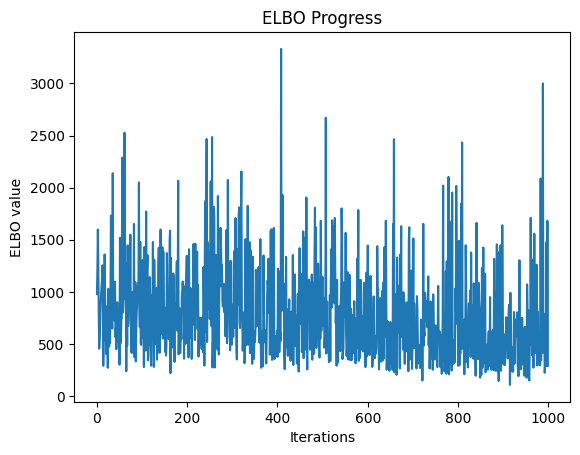

In [ ]:
plt.plot(trace_approx_4.hist)
plt.title('ELBO Progress')
plt.xlabel('Iterations')
plt.ylabel('ELBO value')
plt.show()

In [ ]:
with model_4:
  trace_post_4 = pm.sample_posterior_predictive(trace_4)

Output()

In [ ]:
y_preds = trace_post_4.posterior_predictive["y_obs"].values
mode_predictions_4, _ = mode(y_preds.reshape(-1, y_preds.shape[2]), axis=0)
predictions_4 = mode_predictions_4.squeeze()

In [ ]:
P = predictions_4-y_train_amostra
print(f"Acuracia: {len(P[P==0])/len(y_train_amostra)}")
print(f"Acertos: {len(P[P==0])}")
print(f"Erros: {len(y_train_amostra)-len(P[P==0])}")

Acuracia: 0.998991935483871
Acertos: 991
Erros: 1


In [ ]:
y_preds_test = y_preds[0, :, :len(y_test_amostra)].squeeze()
mode_predictions_4, _ = mode(y_preds_test, axis=0)
predictions_4 = mode_predictions_4.squeeze()

precisao_4 = precision_score(y_test_amostra, predictions_4, average="weighted")
recall_4 = recall_score(y_test_amostra, predictions_4, average="weighted")
f1_4 = f1_score(y_test_amostra, predictions_4, average="weighted")

print(f"Precisão: {precision_4:.4f}")
print(f"Recall: {recall_4:.4f}")
print(f"F1 Score: {f1_4:.4f}")


Precisão: 0.9953
Recall: 0.9977
F1 Score: 0.9965


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
